In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline 

------
#### Способ №1. С помощью готовой функции min.
------

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
%matplotlib inline 


def find_min(a, b, e, f):
    lst_f = {}
    i = 0
    for x in np.arange(a, b + 0.5, e):
        lst_f[x] = f(x)
        i += 1
    df = pd.DataFrame.from_dict(lst_f, orient='index', columns=['f(x)'])
    print('Минимум функции достигается при х, равном {}'.format(df['f(x)'].idxmin()))

    xnew = np.linspace(min(lst_f.keys()), max(lst_f.keys()), 200) 
    spl = make_interp_spline(list(lst_f.keys()), list(lst_f.values()), k=3)
    y_smooth = spl(xnew)
    plt.plot(xnew, y_smooth, color='g')
    plt.plot(min(lst_f, key=lst_f.get), min(lst_f.values()), 'o', ms=8, color='orange')
   
        

Минимум функции достигается при х, равном 1.5


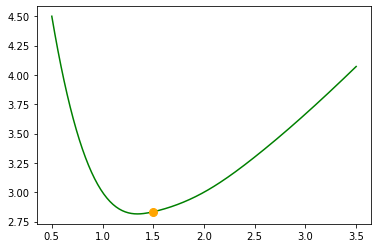

In [87]:
find_min(0.5, 3.5, 0.5, lambda x: x + 2/x)  

------
#### Способ №2. Методом сравнения значений функции на каждой итерации метода.
------

In [102]:
def find_min(a, b, e, f):
    min_x = a
    min_f = f(a)
    for x in np.arange(a, b + 0.5, e):
        if f(x) <= min_f:
            min_f = f(x)
            min_x = x
        else:
            break
    return 'Минимум функции достигается при х, равном {}'.format(min_x)

In [103]:
find_min(0.5, 3.5, 0.5, lambda x: x + 2/x) 

'Минимум функции достигается при х, равном 1.5'

In [95]:
def f(x):  
    return x + 2 / x

from scipy import optimize
grid = (0.5, 3.5, 0.5)
xmin_global = optimize.brute(f, (grid, ))
print('Минимум функции достигается при х, равном {}'.format(*list(xmin_global)))  

Минимум функции достигается при х, равном 1.4142333984375
